# TD4 - Geometric transformations

ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

AUTHOR : CHAITANYA KRISHNA V

In [1]:
%matplotlib inline
# %matplotlib nbagg


#from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform as tf

## 1. Understanding homogenous coordinates and geometric transformations

The following code defines transformation matrices for 2-dimensional points using the homogenous convention. The code visualizes the result of the 

**a)** Recreate different cases of transformation seen on the lecture (add new components if needed)

**A** Added a shear component in x, y and z directions

**b)** Change the order of the composition (e.g. RTS vs STR) and explain the differences. In which cases does the order matter?

**B**  Yes it does, results shown below, change the transfo/transfo1 variable 

**d)** Add the color information. In addition to showing the displacement of the grid coordinates, add the image intensity at each destination location. Hints: create a new grid with the size of the input image, give the right color to each point in the scatter function by using the parameter *c=*.

**D** Done, and passed on as argument

**e)** Create and display the image resulting from the direct application of the transformation. First, create an empty array full of zeros with the appropriate size to contain the image. Then, discretize the values of the coordinates. Finally, fill the pixels with the image content. What is the problem? How to solve it?

**E**  Homographies help relating two view points of the same image. 

translation
 [[  1   0  -5]
 [  0   1 -10]
 [  0   0   1]]
rotation
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
scale
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
shear_x
 [[1.         0.08748866 0.10291528]
 [0.17632698 1.01542661 0.19447372]
 [0.26794919 0.29139171 1.07482274]]
Full transfo_TRS
 [[  0.70710678  -0.70710678  -5.        ]
 [  0.70710678   0.70710678 -10.        ]
 [  0.           0.           1.        ]]
Full transfo_TR and Shear
 [[ -0.75732118  -2.11310976  -5.43885528]
 [ -1.84770314  -2.13403822 -10.53794159]
 [  0.26794919   0.29139171   1.07482274]]
coord list shape after transformation (3, 200)


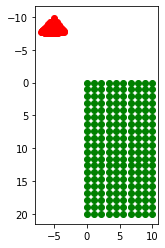

In [2]:
#define the transformation parameters parameters
tx = -5 # horizontal translation
ty = -10 # vertical translation 
theta = np.pi/4 #rotation angle in radians 
sx = 1 # horizontal scale
sy = 1 # vertical scale
sh_x = 5
sh_y = 10
sh_z = 15
theta_shx = np.deg2rad(sh_x)
theta_shy = np.deg2rad(sh_y)
theta_shz = np.deg2rad(sh_z)


#Create the transformation matrices
T = np.array([
    [1, 0, tx ],
    [0, 1, ty ],
    [0, 0, 1]])

R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]])

S = np.array([
    [sx, 0, 0 ],
    [0, sy, 0 ],
    [0, 0, 1]])


# FILL IN here additional shear and projective components

# get the tan of angles
tan_shx = np.tan(theta_shx)
tan_shy = np.tan(theta_shy)
tan_shz = np.tan(theta_shz)
# get the shearing matrix on x axis
Sh_Mx = np.array([[      1, 0, 0],
                    [tan_shy, 1, 0],
                    [tan_shz, 0, 1]])
# get the shearing matrix on y axis
Sh_My = np.array([[1, tan_shx, 0],
                    [0,       1, 0],
                    [0, tan_shz, 1]])
# get the shearing matrix on z axis
Sh_Mz = np.array([[1, 0, tan_shx],
                    [0, 1, tan_shy],
                    [0, 0,       1]])
# compute the full shearing matrix
Sh_M = np.dot(np.dot(Sh_Mx, Sh_My), Sh_Mz)


print('translation\n',T)
print('rotation\n',R)
print('scale\n',S)
print('shear_x\n',Sh_M)


#Compose a single transformation matrix with the three types of transformations

transfo1 = np.matmul(T,np.matmul(R,S))
transfo = np.matmul(T,np.matmul(R,Sh_M))


# FILL IN additional transformations

print('Full transfo_TRS\n',transfo1)
print('Full transfo_TR and Shear\n',transfo)



#Creating a grid of image coordinates
height = 20
width = 10
x = np.linspace(0, width, width)
y = np.linspace(0, height, height)
xx,yy = np.meshgrid(x,y)
coords = np.vstack((xx.ravel(), yy.ravel(), np.ones(width*height)))

#Apply the transformation to the coordinates list
transformedCoords = np.matmul(transfo,coords)

#Normalizing in case of perspective components
transformedCoords[0,:] = transformedCoords[0,:]/transformedCoords[2,:]
transformedCoords[1,:] = transformedCoords[1,:]/transformedCoords[2,:]
print('coord list shape after transformation',transformedCoords.shape)

#Showing the original(green) and transformed coordinates (red)
fig1, ax1 = plt.subplots()
plt.scatter(coords[0,:],coords[1,:],color='g')
plt.scatter(transformedCoords[0,:],transformedCoords[1,:],color='r')
ax1.invert_yaxis()
ax1.set_aspect('equal')
plt.show()



Full transfo
 [[ -0.75732118  -2.11310976  -5.43885528]
 [ -1.84770314  -2.13403822 -10.53794159]
 [  0.26794919   0.29139171   1.07482274]]


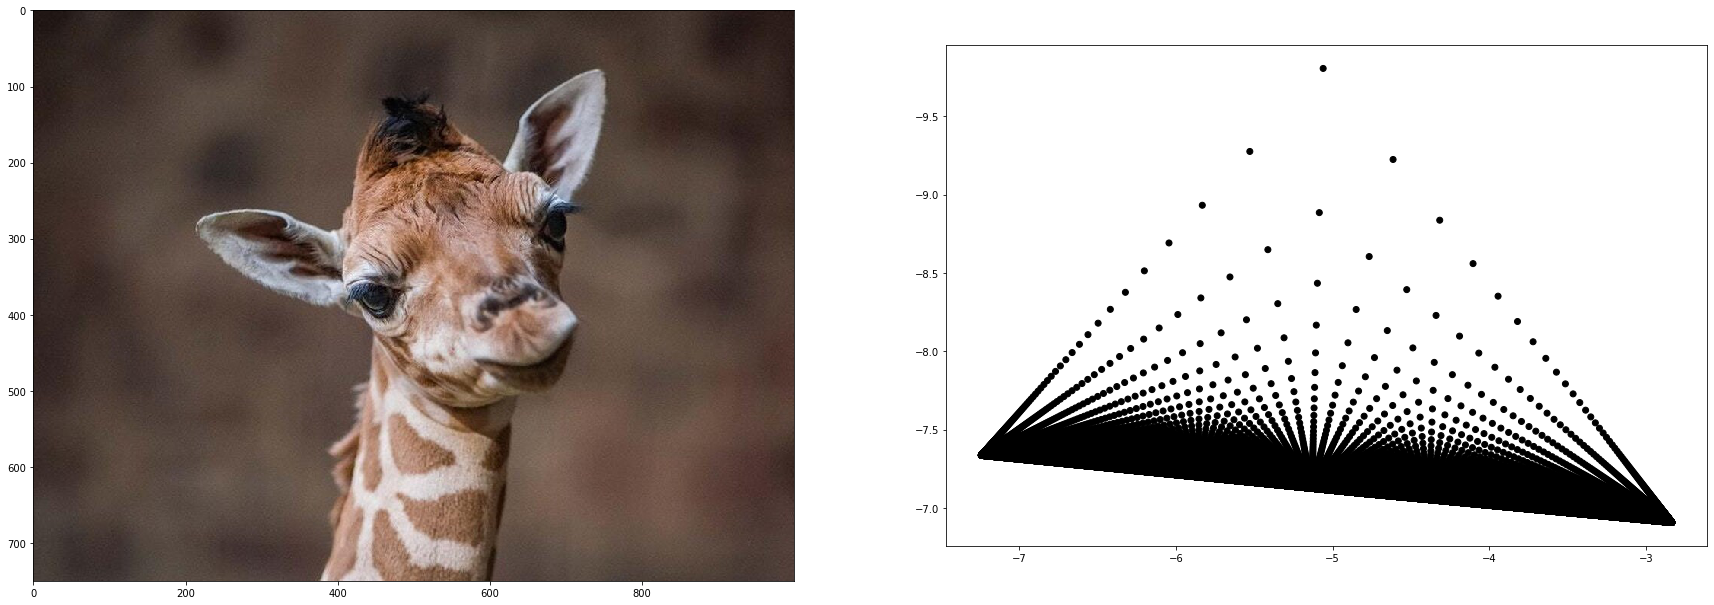

In [3]:
#d) Showing the transformation on an image
from skimage import data
from skimage.transform import resize, rescale
import skimage.io as io
from matplotlib import pyplot as plt


print('Full transfo\n',transfo)

# APPLYING THE TRANSFORMATION TO A GRID OF THE SIZE OF THE IMAGE
image = data.camera()
image = io.imread('giraffe.jpg')
#image = rescale(image, 0.1)


#Creating a grid of image coordinates
height = image.shape[0]
width = image.shape[1]

x = np.linspace(0, width, width)
y = np.linspace(0, height, height)
xx,yy = np.meshgrid(x,y)
coords = np.vstack((xx.ravel(), yy.ravel(), np.ones(width*height)))

#Apply the transformation to the coordinates list
transformedCoords = np.matmul(transfo,coords)

#Normalizing in case of perspective components
transformedCoords[0,:] = transformedCoords[0,:]/transformedCoords[2,:]
transformedCoords[1,:] = transformedCoords[1,:]/transformedCoords[2,:]

#raveling of colors
colorArray=np.zeros((width*height,3))
colors = np.array(["black", "green"])

# FILL IN THE COLOR ARRAY

# Create a new grid with the size of the input image,
#  give the right color to each point in the scatter function by using the parameter c=


width=30
height=15
fig, axes = plt.subplots(1, 2, figsize=(width, height))
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')

ax[1].scatter(transformedCoords[0,:],transformedCoords[1,:],c=colors[colorArray])
plt.gray()
ax[1].invert_yaxis()
ax[1].set_aspect('equal')
plt.show()

#save image to file
ax[0].tick_params(axis='both',labelsize=28)
ax[1].tick_params(axis='both',labelsize=28)

fig.savefig('translation.png', bbox_inches='tight')



## 2. Using skimage geometric transformations


In this notebook, we will see how to use geometric transformations in the context of image processing. The first part of the notebook is based on skimage's tutorial 

https://scikit-image.org/docs/0.12.x/auto_examples/xx_applications/plot_geometric.html


### 2.1 Basic commands

Skimage's transform module supports several different geometric transformation types: similarity, affine, projective and polynomial.

Geometric transformations can either be created using the explicit
parameters (e.g. scale, shear, rotation and translation) or the
transformation matrix:

First we create a transformation using explicit parameters:



In [5]:
tform = tf.SimilarityTransform(scale=1, rotation=math.pi/2, translation=(0, 1))
print(tform.params)

[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


Alternatively you can define a transformation by creating or modifying the transformation matrix
itself:



In [6]:
matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = tf.SimilarityTransform(matrix)

These transformation objects can then be used to apply forward and inverse
coordinate transformations between the source and destination coordinate
systems:



In [236]:
coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform2(coord)))

[[6.123234e-17 3.000000e+00]]
[[ 1.00000000e+00 -2.46519033e-32]]


### 2.1 Image warping

The same geometric transformations can also be used to warp images. Change the parameters of the similarity transformation and observe the results. What happens with the third image?

**A**  Keep in mind that for images, the origin is at the top-left corner of the image. In the third image, we can see the power of perspective transformation. 


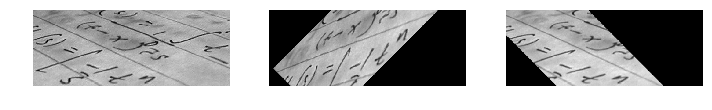

In [237]:
text = data.text()

tform = tf.SimilarityTransform(scale=1, rotation=math.pi/4,
                               translation=(text.shape[0]/2, -100))

rotated = tf.warp(text, tform)
back_rotated = tf.warp(rotated, tform.inverse)

fig, ax = plt.subplots(ncols=3,figsize=(10, 3))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[1].imshow(rotated, cmap=plt.cm.gray)
ax[2].imshow(back_rotated, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

### 2.3 Projective transformations
Try the effect of different projective transformations by using a the composition of two transformations. 
- One using a given matrix (where you can change the projective related parameters)
- A similarity transformation

[[1.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00]
 [1.e-04 9.e-04 1.e+00]]


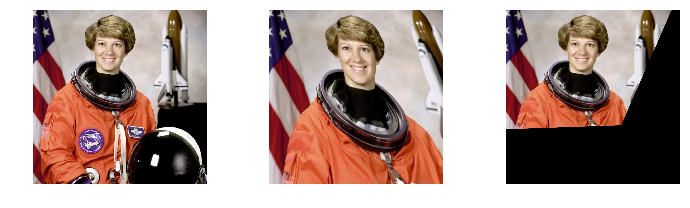

In [7]:
#text = data.text()
img = data.astronaut()

T = np.zeros((3,3)) 
T[0,0] = 1.
T[0,1] = 0.
T[0,2] = 0.

T[1,0] = 0.
T[1,1] = 1.
T[1,2] = 0.

T[2,0] = 0.0001
T[2,1] = 0.0009
T[2,2] = 1.

tform = tf.ProjectiveTransform(matrix = T)
print(tform.params)

#tform2 = tf.SimilarityTransform(scale=5, rotation=math.pi/4,translation=(10,10))
#tform = tf.ProjectiveTransform(matrix = np.matmul(tform.params, tform2.params))

transformed = tf.warp(img, tform)
back_transformed = tf.warp(transformed, tform.inverse)

fig, ax = plt.subplots(ncols=3, figsize=(10, 3))
ax[0].imshow(img, cmap=plt.cm.gray)
ax[1].imshow(transformed, cmap=plt.cm.gray)
ax[2].imshow(back_transformed, cmap=plt.cm.gray)
for a in ax:
    a.axis('off')
plt.tight_layout()

## 3. Homography parameter estimation

If we want to relate the coordinates of two planar objects we may use the ``estimate`` functionality of skimage in order to estimate the parametes of the transformation. Given two arrays of point-correspondences, it will use the **least-squares method** to find the best fitting parameters of an homography. Among other applications, homography estimation can be used for image registration or rectification.

In the example shown before we assume we want to recognize letters on a photograph which was not taken from the front but at a certain angle. In the simplest case of a plane paper surface the letters are projectively distorted. Simple matching algorithms would not be able to match such symbols. One solution to this problem is to warp the image so that the distortion is removed and then apply a matching algorithm.



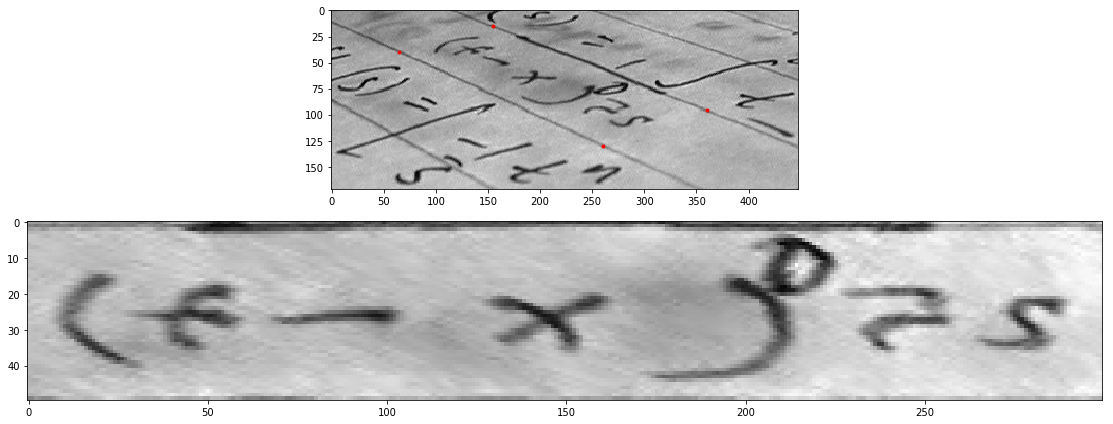

In [8]:
text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(16, 6))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

#for a in ax:
#    a.axis('off')

plt.tight_layout()

## 4. Augmented reality

Use the same procedure as in 2 to estimate the transformations allowing to

- create a starwars introductory text overlayed over the ``HyadesPleiades`` image, imagine the coordinates of the desired transformed plane to establish the point correspondences.
<TABLE>
   <TR>
    <TD><img src="HyadesPleiades.jpg" alt="drawing" width="300"/></TD>
    <TD><img src="starwars-text-v-short.png" alt="drawing" width="300"/></TD>
   </TR>
</TABLE>  
- exchange one of the frames inside the ``times-square`` and bring it to the ``museum`` (or visceversa).
<TABLE>
   <TR>
      <TD><img src="times-square.jpg" alt="drawing" width="300"/></TD>
      <TD><img src="museum.png" alt="drawing" width="300"/></TD>
   </TR>
</TABLE>   
